In [ ]:
import pandas as pd
df=pd.read_csv('abcnews-date-text.csv',usecols=['headline_text'],nrows=10000)
df

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers
...,...
9995,us units attack palace as fighting rages in heart
9996,vasco win 10 goal thriller in brazil on edmundos
9997,vic bushfires inquiry begins
9998,vic govt plan aims to reduce water use


In [22]:
txt=df.headline_text
txt

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers
...,...
9995,us units attack palace as fighting rages in heart
9996,vasco win 10 goal thriller in brazil on edmundos
9997,vic bushfires inquiry begins
9998,vic govt plan aims to reduce water use


In [23]:
txt = txt.str.replace("[^a-zA-Z0-9]+", " ", regex=True)
txt

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers
...,...
9995,us units attack palace as fighting rages in heart
9996,vasco win 10 goal thriller in brazil on edmundos
9997,vic bushfires inquiry begins
9998,vic govt plan aims to reduce water use


In [24]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.stem import SnowballStemmer
from nltk import word_tokenize
stemmer = SnowballStemmer('english')
txt=txt.apply(lambda x:[stemmer.stem(token.lower())for token in word_tokenize(x)]).apply(lambda token:' '.join(token))
txt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,headline_text
0,aba decid against communiti broadcast licenc
1,act fire wit must be awar of defam
2,a g call for infrastructur protect summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travel
...,...
9995,us unit attack palac as fight rage in heart
9996,vasco win 10 goal thriller in brazil on edmundo
9997,vic bushfir inquiri begin
9998,vic govt plan aim to reduc water use


In [25]:
from nltk.corpus import stopwords
nltk.download('stopwords')
sw=stopwords.words('english')
txt = txt.apply(lambda x:[token for token in word_tokenize(x) if token not in sw]).apply(lambda token:' '.join(token))
txt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,headline_text
0,aba decid communiti broadcast licenc
1,act fire wit must awar defam
2,g call infrastructur protect summit
3,air nz staff aust strike pay rise
4,air nz strike affect australian travel
...,...
9995,us unit attack palac fight rage heart
9996,vasco win 10 goal thriller brazil edmundo
9997,vic bushfir inquiri begin
9998,vic govt plan aim reduc water use


# remove length of 2 token like g ,us

In [26]:
txt=txt.apply(lambda x:[token for token in word_tokenize(x) if len(token)>2]).apply(lambda token:" ".join(token))
txt

,headline_text
0,aba decid communiti broadcast licenc
1,act fire wit must awar defam
2,call infrastructur protect summit
3,air staff aust strike pay rise
4,air strike affect australian travel
...,...
9995,unit attack palac fight rage heart
9996,vasco win goal thriller brazil edmundo
9997,vic bushfir inquiri begin
9998,vic govt plan aim reduc water use


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(txt)
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 50879 stored elements and shape (10000, 7053)>
  Coords	Values
  (0, 146)	0.5103644709222088
  (0, 1768)	0.40673400368770146
  (0, 1443)	0.35278224419585436
  (0, 943)	0.47799782429829546
  (0, 3644)	0.47027473375751233
  (1, 198)	0.34452777801914436
  (1, 2449)	0.2871157610862832
  (1, 6935)	0.4256166321182425
  (1, 4163)	0.38964572098383743
  (1, 560)	0.4729217098434841
  (1, 1782)	0.4921756808813915
  (2, 1060)	0.3631482545495525
  (2, 3211)	0.603843955663636
  (2, 4891)	0.49596149094917574
  (2, 6082)	0.5074623354708966
  (3, 269)	0.38229062089434696
  (3, 5921)	0.4671270723556268
  (3, 538)	0.3808058275033573
  (3, 6025)	0.40126174130834125
  (3, 4573)	0.40863442085309437
  (3, 5275)	0.4032865311963851
  (4, 269)	0.40002355345809143
  (4, 6025)	0.41987466825482267
  (4, 236)	0.49773233288998325
  (4, 542)	0.4138785263344187
  :	:
  (9995, 4501)	0.45978544979100294
  (9996, 6914)	0.2531697730804615
  (9996, 2727)	0.38137

In [28]:
vectorizer.get_feature_names_out()

array(['100', '1000', '10000', ..., 'zone', 'zoo', 'zurich'], dtype=object)

In [29]:
X.shape

(10000, 7053)

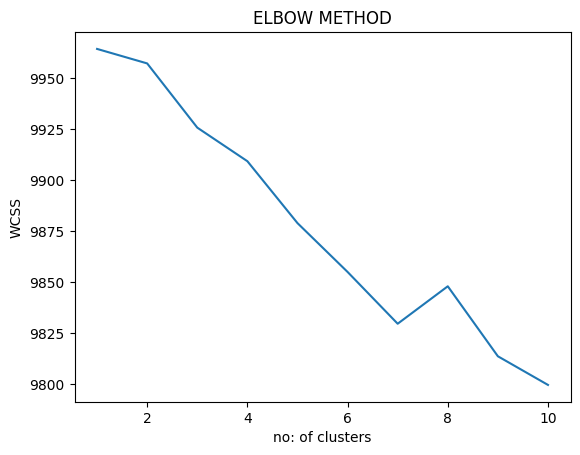

In [30]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
WCSS=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,random_state=42)
  km.fit(X)
  WCSS.append(km.inertia_)
plt.plot(range(1,11),WCSS)
plt.xlabel("no: of clusters")
plt.ylabel("WCSS")
plt.title("ELBOW METHOD")
plt.show()

In [31]:
km=KMeans(n_clusters=9,random_state=1)
y=km.fit_predict(X)
y

array([4, 1, 2, ..., 4, 3, 3], dtype=int32)

In [32]:
df['cluster']=y
df

,headline_text,cluster
0,aba decides against community broadcasting lic...,4
1,act fire witnesses must be aware of defamation,1
2,a g calls for infrastructure protection summit,2
3,air nz staff in aust strike for pay rise,0
4,air nz strike to affect australian travellers,0
...,...,...
9995,us units attack palace as fighting rages in heart,4
9996,vasco win 10 goal thriller in brazil on edmundos,4
9997,vic bushfires inquiry begins,4
9998,vic govt plan aims to reduce water use,3


In [33]:
!pip install wordcloud

In [34]:
from wordcloud import WordCloud
df0=df[df['cluster']==0]
df1=df[df['cluster']==1]
df2=df[df['cluster']==2]
def generate_wordcloud(df,tifle):
  text=" ".join(df['headline_text'].astype(str).tolist())
  wordcloud=WordCloud(width=800,height=400,background_color="white").generate(text)
  plt.figure()
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis("off")
  plt.title(tifle)
  plt.show()


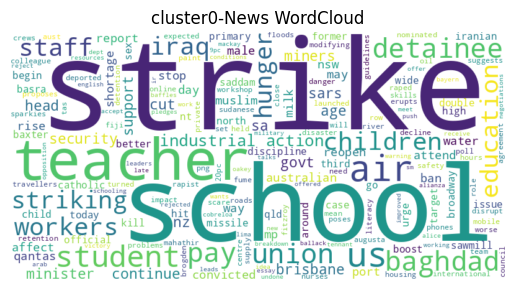

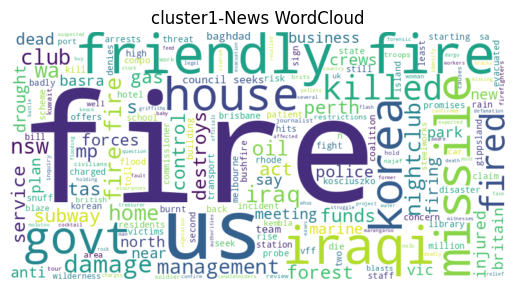

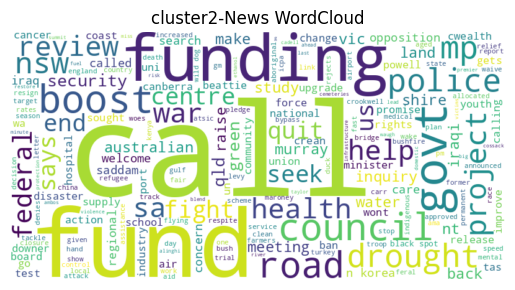

In [35]:
generate_wordcloud(df0,'cluster0-News WordCloud')
generate_wordcloud(df1,'cluster1-News WordCloud')
generate_wordcloud(df2,'cluster2-News WordCloud')